## Load (2015-2020 NVT Soil and Weather metadata sg 01.10.2021_anonymized)

In [128]:
import pandas as pd
import openpyxl
import os
import glob
from pathlib import Path

In [129]:
file_path = Path("Tabular_Sem1-A15129") / "2015-2020 NVT Soil and Weather metadata sg 01.10.2021_anonymized.xlsx"

# Convert to an absolute path (optional)
file_path = file_path.resolve()

df_soil = pd.read_excel(file_path, sheet_name='Soil Data', engine="openpyxl")


df_soil.shape

(3031, 52)

In [130]:
df_soil.columns

Index(['Year', 'Crop.Name', 'State', 'RegionName', 'SiteDescription',
       'TrialCode', 'SeriesName', 'Company.Name', 'SowingDate', 'HarvestDate',
       'Abandoned', 'Released', 'SoilTestID', 'MinDepth', 'MaxDepth',
       'SoilTestDepthDescription', '<>', 'Aluminium', 'Ammonium Nitrogen',
       'Boron', 'Calcium', 'CCN', 'CCN Test Type', 'Chloride', 'Colour',
       'Conductivity (EC)', 'Copper', 'Exchangeable Al', 'Exchangeable Ca',
       'Exchangeable K', 'Exchangeable Mg', 'Exchangeable Mn',
       'Exchangeable Na', 'Gravel', 'K Test Type', 'Magnesium', 'Manganese',
       'Molybdenum', 'Nitrate Nitrogen', 'Organic Carbon', 'P Test Type',
       'pH (CaCl2)', 'pH (water)', 'Phosphorous',
       'Phosphorous Buffering Index', 'Potassium (K)', 'Reactive Iron',
       'Sodium', 'Sulphur', 'Texture', 'Total N', 'Zinc'],
      dtype='object')

## EDA for (2015-2020 NVT Soil and Weather metadata sg 01.10.2021_anonymized)

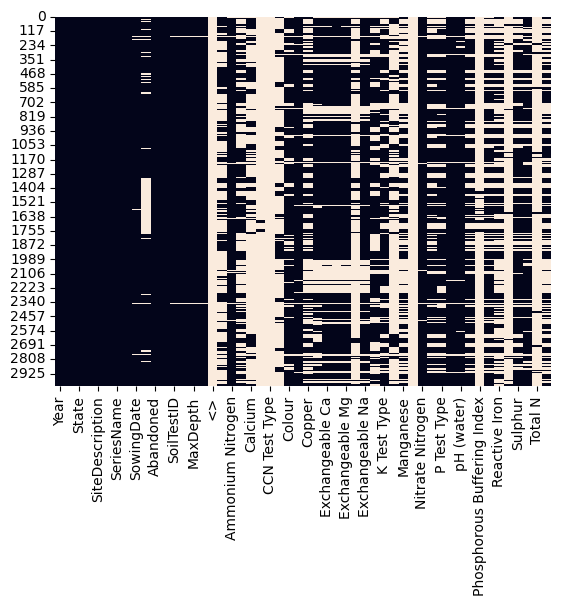

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_soil.isna(), cbar=False)
plt.show()

### Number of unique trialCodes

In [132]:
# calcuate number of unique trialCodes
df_soil['TrialCode'].nunique()

1526

### Filter abandoned column to False

In [133]:
#filter abandoned column to false
df_soil = df_soil[df_soil['Abandoned'] == False]
df_soil.shape

(2794, 52)

Filter only released data and pending

In [134]:
df_soil = df_soil[(df_soil['Released'] == 1) | (df_soil['Released'] == 0)]

### Missing values

In [135]:
pd.DataFrame(df_soil.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Year,0
Crop.Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SeriesName,0
Company.Name,0
SowingDate,0
HarvestDate,448


### Remove columns with more than 30% missing values

In [136]:
# remvove features with more than 50% missing values
cols_to_drop = df_soil.columns[df_soil.isnull().mean() > 0.3]
df_soil.drop(columns=cols_to_drop, inplace=True)

In [137]:
df_soil.columns

Index(['Year', 'Crop.Name', 'State', 'RegionName', 'SiteDescription',
       'TrialCode', 'SeriesName', 'Company.Name', 'SowingDate', 'HarvestDate',
       'Abandoned', 'Released', 'SoilTestID', 'MinDepth', 'MaxDepth',
       'SoilTestDepthDescription', 'Ammonium Nitrogen', 'Colour',
       'Conductivity (EC)', 'Exchangeable Al', 'Exchangeable Ca',
       'Exchangeable K', 'Exchangeable Mg', 'Exchangeable Na', 'K Test Type',
       'Nitrate Nitrogen', 'Organic Carbon', 'P Test Type', 'pH (CaCl2)',
       'pH (water)', 'Phosphorous', 'Sulphur', 'Texture'],
      dtype='object')

In [138]:


df_soil.head()

,Year,Crop.Name,State,RegionName,SiteDescription,TrialCode,SeriesName,Company.Name,SowingDate,HarvestDate,...,Exchangeable Na,K Test Type,Nitrate Nitrogen,Organic Carbon,P Test Type,pH (CaCl2),pH (water),Phosphorous,Sulphur,Texture
0,2018,Wheat,NSW,N/E,Bellata,trial_405,Early Season,NVT,2018-05-16,2018-11-15,...,NaN,NaN,19,0.55,NaN,7.6,8.4,34.0,3.7,4.0
1,2018,Wheat,NSW,N/E,Bellata,trial_405,Early Season,NVT,2018-05-16,2018-11-15,...,NaN,NaN,2,NaN,NaN,8.0,8.9,19.0,2.8,4.0
2,2018,Wheat,NSW,N/E,Bellata,trial_1119,Main Season,NVT,2018-06-04,2018-11-17,...,NaN,NaN,19,0.55,NaN,7.6,8.4,34.0,3.7,4.0
3,2018,Wheat,NSW,N/E,Bellata,trial_1119,Main Season,NVT,2018-06-04,2018-11-17,...,NaN,NaN,2,NaN,NaN,8.0,8.9,19.0,2.8,4.0
4,2018,Wheat,NSW,N/E,Bellata,trial_1746,Durum,NVT,2018-06-04,2018-11-17,...,NaN,NaN,19,0.55,NaN,7.6,8.4,34.0,3.7,4.0


In [139]:
pd.DataFrame(df_soil.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Year,0
Crop.Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SeriesName,0
Company.Name,0
SowingDate,0
HarvestDate,448


### Remove rows with more than 50% missing values

In [140]:
remaining_cols = df_soil.shape[1]
row_threshold = remaining_cols * 0.5
df_soil = df_soil.dropna(thresh=row_threshold)
print(f"Rows remaining: {df_soil.shape[0]}")

Rows remaining: 2405


In [141]:
pd.DataFrame(df_soil.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Year,0
Crop.Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SeriesName,0
Company.Name,0
SowingDate,0
HarvestDate,448


In [142]:
# show all rows
print(df_soil.dtypes.to_string())

Year                                 int64
Crop.Name                           object
State                               object
RegionName                          object
SiteDescription                     object
TrialCode                           object
SeriesName                          object
Company.Name                        object
SowingDate                  datetime64[ns]
HarvestDate                 datetime64[ns]
Abandoned                             bool
Released                             int64
SoilTestID                         float64
MinDepth                           float64
MaxDepth                           float64
SoilTestDepthDescription            object
Ammonium Nitrogen                   object
Colour                              object
Conductivity (EC)                  float64
Exchangeable Al                     object
Exchangeable Ca                    float64
Exchangeable K                     float64
Exchangeable Mg                    float64
Exchangeabl

In [143]:
object_cols_to_convert = [
    'Ammonium Nitrogen', 'Exchangeable Al',
    'Nitrate Nitrogen'
]

print("Initial dtypes:")
print(df_soil.dtypes)

# Function to clean and convert to float64
def clean_to_float(series):
    # Replace common non-numeric patterns and extract numbers
    cleaned = series.str.replace(r'[><%]', '', regex=True)  # Remove >, <, %
    cleaned = cleaned.str.strip()  # Remove leading/trailing spaces
    return pd.to_numeric(cleaned, errors='coerce')

# Apply conversion to each object column
for col in object_cols_to_convert:
    df_soil[col] = clean_to_float(df_soil[col])
    #print(f"\nConverted {col}:")
    #print(df_soil[col])

# Verify dtypes after conversion
print("\nFinal dtypes:")
print(df_soil.dtypes)

Initial dtypes:
Year                                 int64
Crop.Name                           object
State                               object
RegionName                          object
SiteDescription                     object
TrialCode                           object
SeriesName                          object
Company.Name                        object
SowingDate                  datetime64[ns]
HarvestDate                 datetime64[ns]
Abandoned                             bool
Released                             int64
SoilTestID                         float64
MinDepth                           float64
MaxDepth                           float64
SoilTestDepthDescription            object
Ammonium Nitrogen                   object
Colour                              object
Conductivity (EC)                  float64
Exchangeable Al                     object
Exchangeable Ca                    float64
Exchangeable K                     float64
Exchangeable Mg                    flo

In [144]:
numeric_cols = df_soil.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_soil.select_dtypes(include=['object']).columns
date_cols = df_soil.select_dtypes(include=['datetime64']).columns
print(f"Numeric columns: {numeric_cols}")

Numeric columns: Index(['Year', 'Released', 'SoilTestID', 'MinDepth', 'MaxDepth',
       'Ammonium Nitrogen', 'Conductivity (EC)', 'Exchangeable Al',
       'Exchangeable Ca', 'Exchangeable K', 'Exchangeable Mg',
       'Exchangeable Na', 'Nitrate Nitrogen', 'Organic Carbon', 'pH (CaCl2)',
       'pH (water)', 'Phosphorous', 'Sulphur', 'Texture'],
      dtype='object')


In [145]:
print(df_soil.dtypes)

Year                                 int64
Crop.Name                           object
State                               object
RegionName                          object
SiteDescription                     object
TrialCode                           object
SeriesName                          object
Company.Name                        object
SowingDate                  datetime64[ns]
HarvestDate                 datetime64[ns]
Abandoned                             bool
Released                             int64
SoilTestID                         float64
MinDepth                           float64
MaxDepth                           float64
SoilTestDepthDescription            object
Ammonium Nitrogen                  float64
Colour                              object
Conductivity (EC)                  float64
Exchangeable Al                    float64
Exchangeable Ca                    float64
Exchangeable K                     float64
Exchangeable Mg                    float64
Exchangeabl

### Feature Selection

In [146]:
from sklearn.impute import KNNImputer

# KNN imputation

imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_soil[numeric_cols] = imputer.fit_transform(df_soil[numeric_cols])

In [147]:
# show whole row
pd.set_option('display.max_rows', None)
pd.DataFrame(df_soil.isnull().sum(), columns=['Number of missing values'])


,Number of missing values
Year,0
Crop.Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SeriesName,0
Company.Name,0
SowingDate,0
HarvestDate,448


In [148]:
#df_soil = df_soil.rename(columns={'Year': 'Soil_Year', 'TrialCode': 'Soil_TrialCode', 'State': 'Soil_State', 'RegionName': 'Soil_RegionName', 'SiteDescription': 'Soil_SiteDescription', 'SeriesName': 'Soil_SeriesName', 'Company.Name': 'Soil_Comapy.Name', 'SowingDate': 'Soil_SowingDate', 'HarvestDate': 'Soil_HarvestDate', 'MinDepth': 'Soil_MinDepth', 'MaxDepth': 'Soil_MaxDepth'})
df_soil.columns = ['Soil_' + col for col in df_soil.columns]

df_soil.columns

Index(['Soil_Year', 'Soil_Crop.Name', 'Soil_State', 'Soil_RegionName',
       'Soil_SiteDescription', 'Soil_TrialCode', 'Soil_SeriesName',
       'Soil_Company.Name', 'Soil_SowingDate', 'Soil_HarvestDate',
       'Soil_Abandoned', 'Soil_Released', 'Soil_SoilTestID', 'Soil_MinDepth',
       'Soil_MaxDepth', 'Soil_SoilTestDepthDescription',
       'Soil_Ammonium Nitrogen', 'Soil_Colour', 'Soil_Conductivity (EC)',
       'Soil_Exchangeable Al', 'Soil_Exchangeable Ca', 'Soil_Exchangeable K',
       'Soil_Exchangeable Mg', 'Soil_Exchangeable Na', 'Soil_K Test Type',
       'Soil_Nitrate Nitrogen', 'Soil_Organic Carbon', 'Soil_P Test Type',
       'Soil_pH (CaCl2)', 'Soil_pH (water)', 'Soil_Phosphorous',
       'Soil_Sulphur', 'Soil_Texture'],
      dtype='object')

In [149]:
df_soil['Soil_GrowingPeriod'] = (df_soil['Soil_HarvestDate'] - df_soil['Soil_SowingDate']).dt.days
avg_period = df_soil['Soil_GrowingPeriod'].mean()
df_soil.loc[df_soil['Soil_HarvestDate'].isna(), 'Soil_HarvestDate'] = \
    df_soil['Soil_SowingDate'] + pd.to_timedelta(avg_period, unit='D')

In [150]:
df_soil.drop(columns=['Soil_Crop.Name', 'Soil_K Test Type', 'Soil_P Test Type', 'Soil_Abandoned', 'Soil_Colour', 'Soil_GrowingPeriod', 'Soil_Released', 'Soil_Year', 'Soil_TrialCode'], inplace=True)


In [151]:
pd.DataFrame(df_soil.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Soil_State,0
Soil_RegionName,0
Soil_SiteDescription,0
Soil_SeriesName,0
Soil_Company.Name,0
Soil_SowingDate,0
Soil_HarvestDate,0
Soil_SoilTestID,0
Soil_MinDepth,0
Soil_MaxDepth,0


In [152]:
df_soil['Soil_SoilTestID'].nunique()

2405

## Import processed_weather_crop_sentinel2_data

In [153]:
file_path = Path("intermediate_tables") / "parquet_files" / "processed_weather_crop_sentinel2_data.parquet"
file_path = file_path.resolve()
df_centralised = pd.read_parquet(file_path, engine='pyarrow')

In [154]:
numeric_cols = df_soil.select_dtypes(include=['float64', 'int64']).columns
df_soil = df_soil.groupby('Soil_TrialCode')[numeric_cols].mean().reset_index()
df_centralised = pd.merge(df_centralised, df_soil, left_on='TrialCode', right_on='Soil_TrialCode', how='left')


KeyError: 'Soil_TrialCode'

In [ ]:

df_centralised = df_centralised.dropna()

In [ ]:
pd.DataFrame(df_centralised.isnull().sum(), columns=['Number of missing values'])

,Number of missing values
Year,0
Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SowingDate,0
HarvestDate,0
Abandoned,0
CultivarID,0


In [ ]:
df_centralised.shape

(32493, 54)

In [ ]:
file_path = Path("intermediate_tables") / "csv_files" / "processed_weather_crop_sentinel2_data_with_soil.csv"
file_path = file_path.resolve()


df_centralised.to_csv(file_path, index=False)



In [ ]:
file_path = Path("intermediate_tables") / "parquet_files" / "df_processed_weather_crop_sentinel2_soil.parquet"
file_path = file_path.resolve()

df_centralised.to_parquet(file_path, index=False)

In [ ]:
pd.DataFrame(df_centralised.isnull().sum(), columns=['Number of missing values'])
#df_centralised.shape

,Number of missing values
Year,0
Name,0
State,0
RegionName,0
SiteDescription,0
TrialCode,0
SowingDate,0
HarvestDate,0
Abandoned,0
CultivarID,0


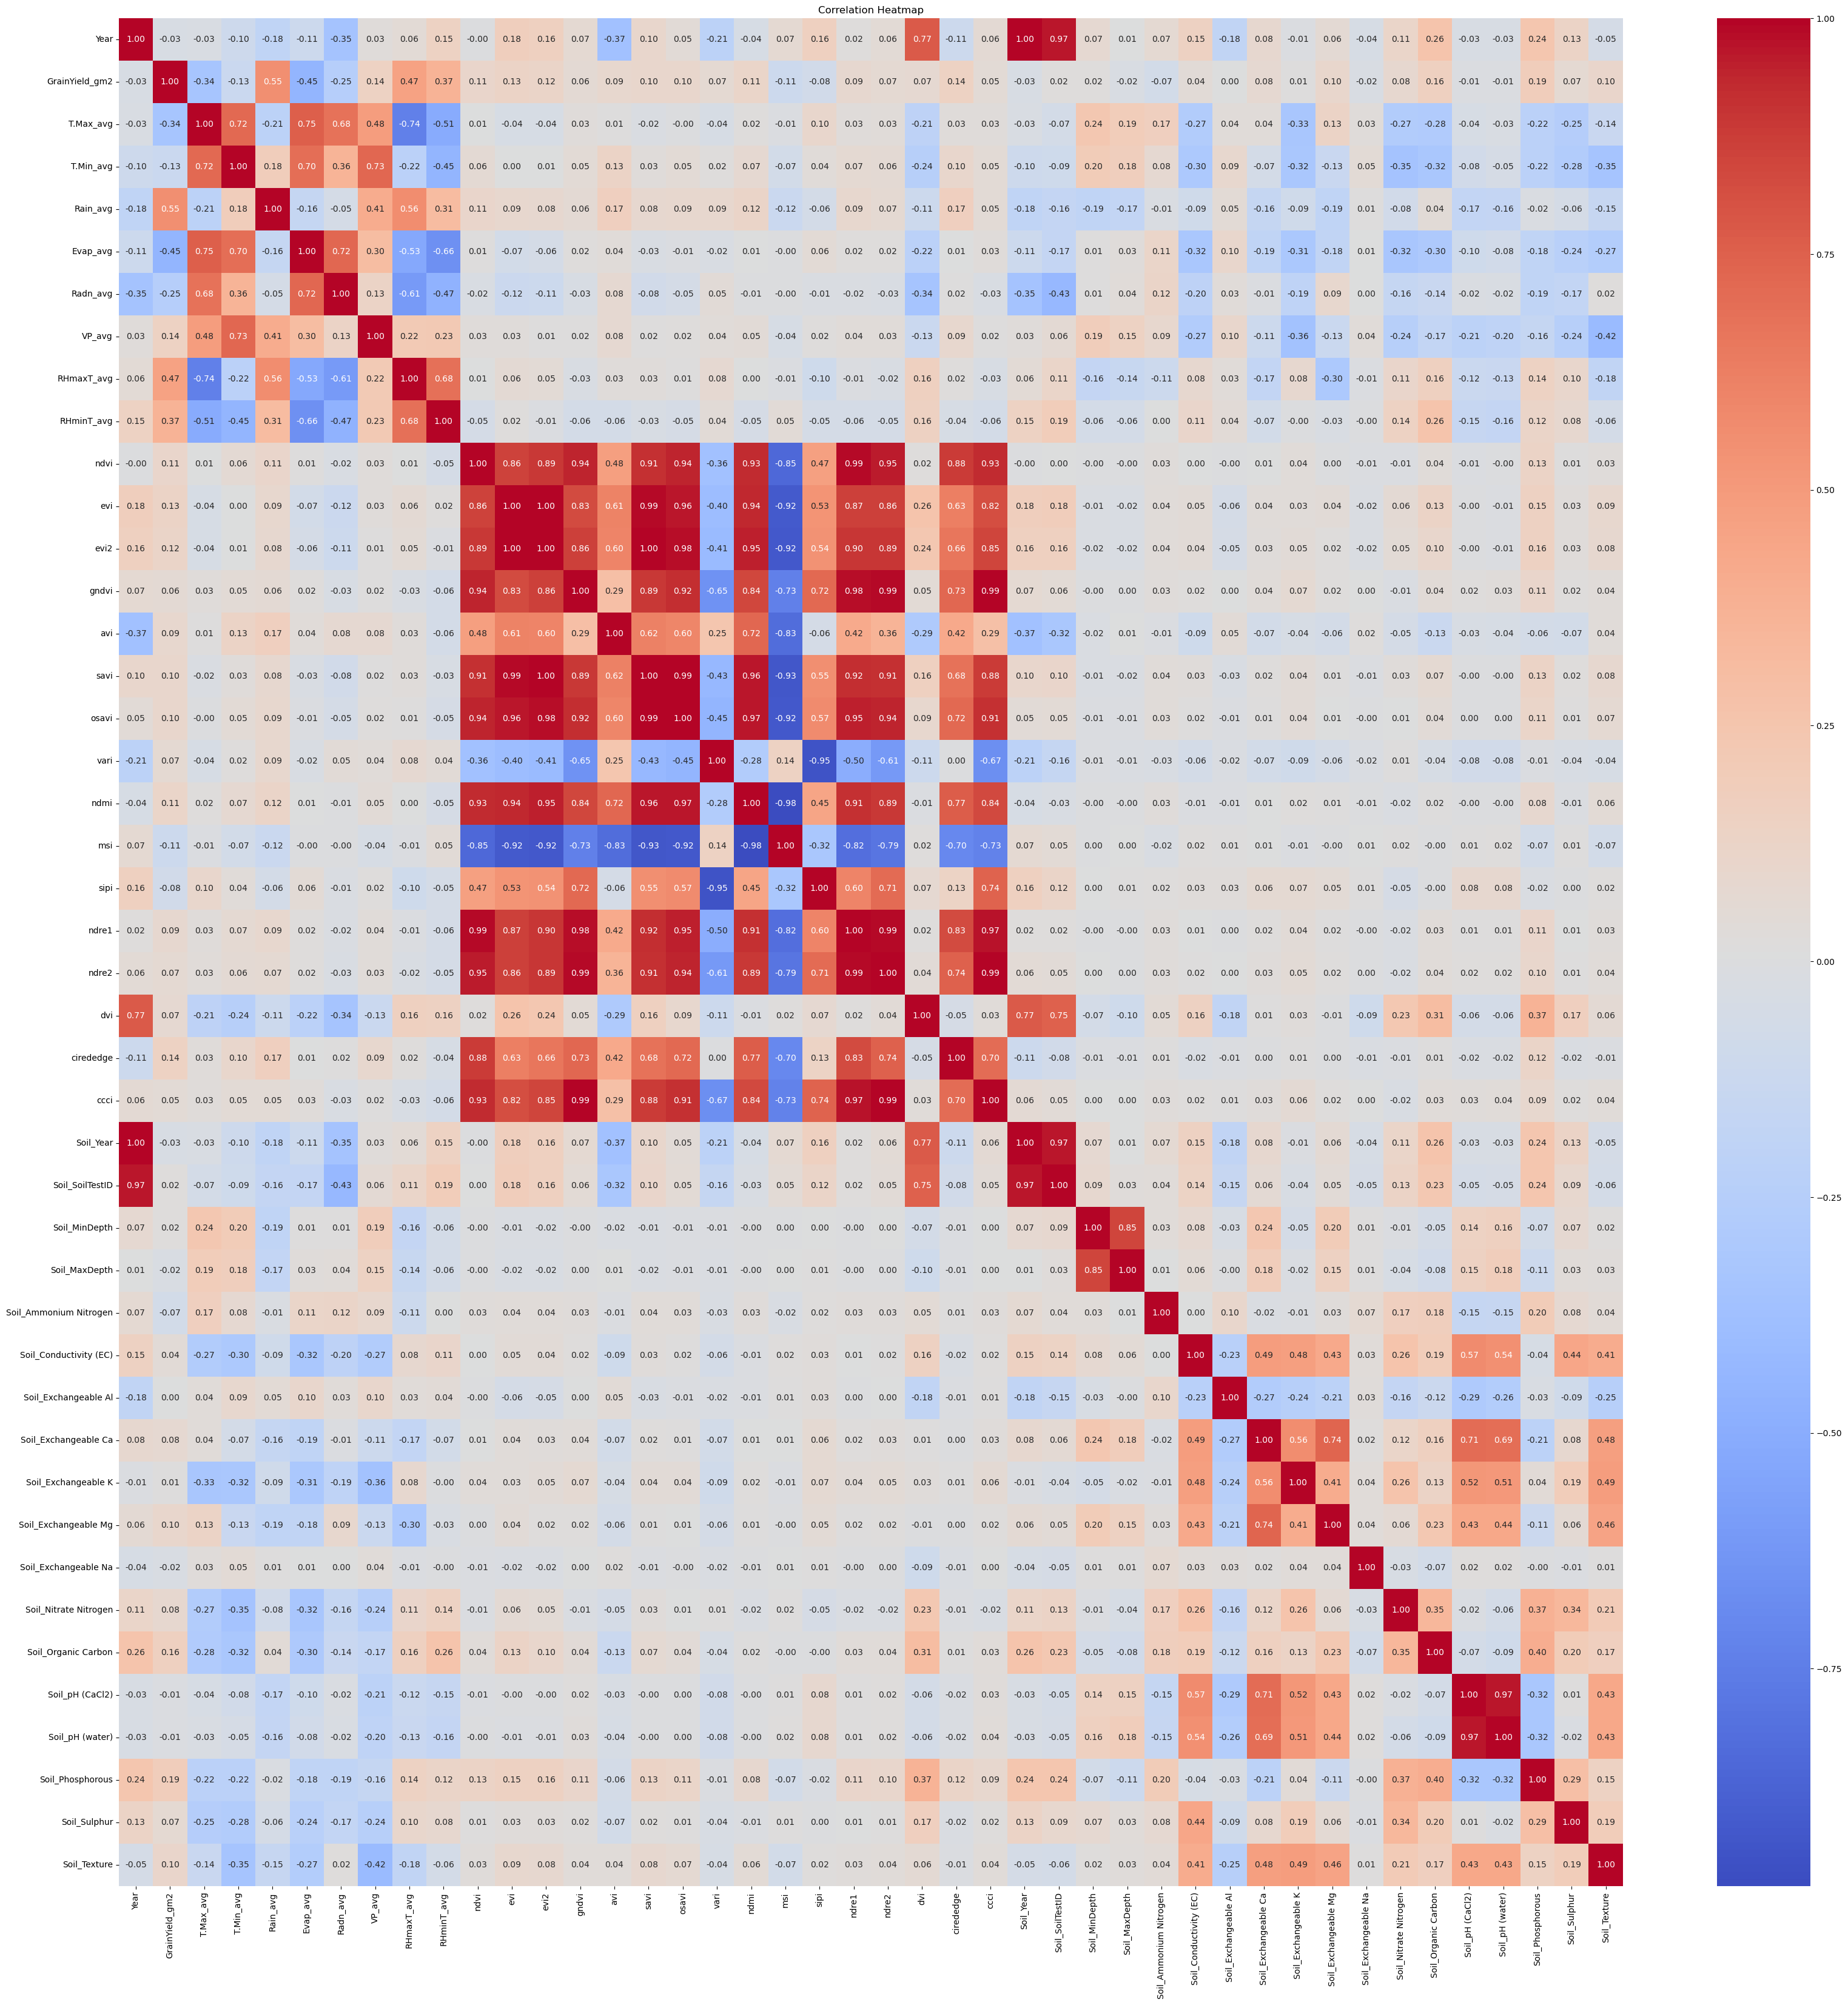

In [ ]:
#do correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df_centralised.select_dtypes(include=['float64', 'int64'])

#part1 = numeric_df.iloc[:, :int(numeric_df.shape[1] / 2)]
part2 = numeric_df.iloc[:, int(numeric_df.shape[0] / 2):]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
#correlation_matrix = part1.corr()

# Plot the heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



### Distribution of df_soil

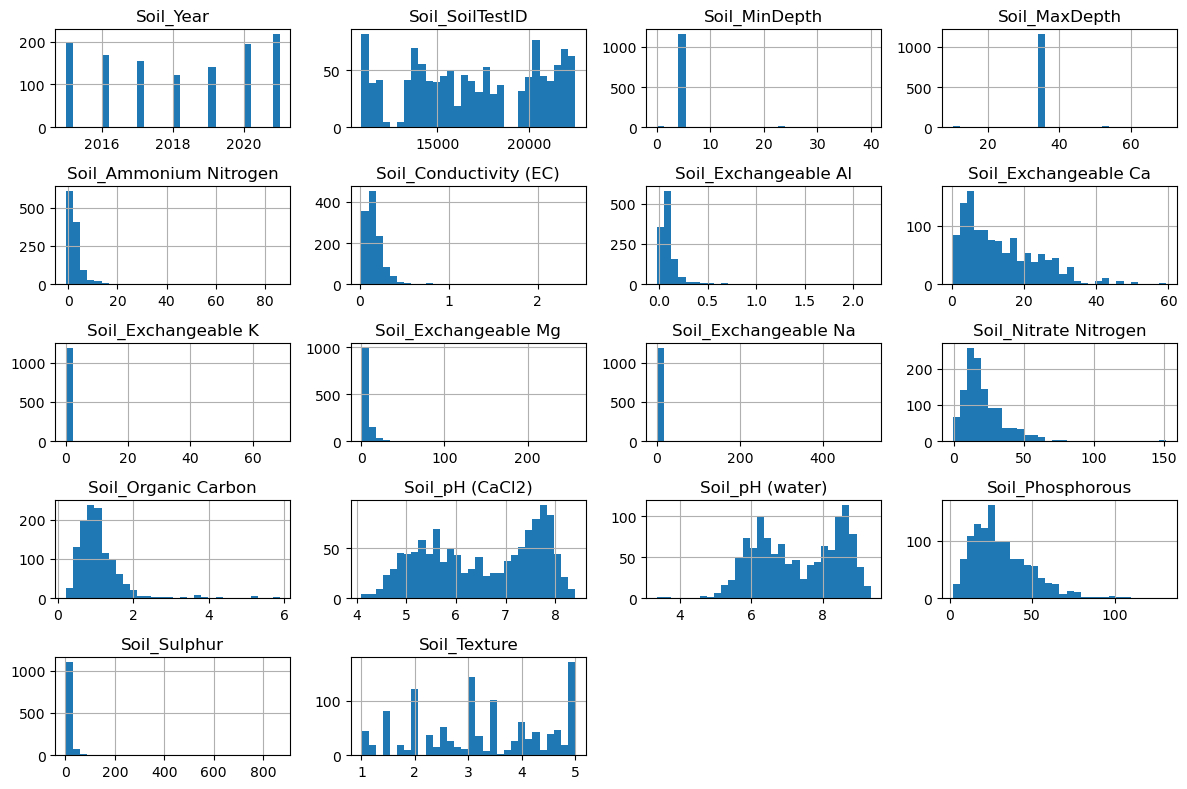

In [ ]:
import matplotlib.pyplot as plt

df_soil.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Encode Categorical Values